In [1]:
import pandas as pd
data = pd.DataFrame(pd.read_csv ("/Users/zhaojiale/Desktop/study/STAT617/midterm project/winequality-red.csv",sep=";"))
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
import matplotlib.pyplot as plt
data.hist(figsize=(16,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1148a7150>,
      dtype=object)

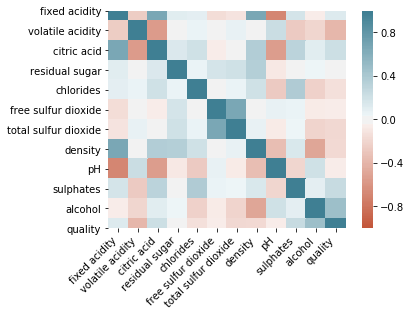

In [3]:
#Correlation
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [4]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates', 'alcohol'] 
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['quality']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [5]:
import numpy as np
cov_mat = np.cov(x.transpose())
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) 
print('\nEigenvalues \n%s' % eigen_vals)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)
print('\nVariance explained \n%s' % var_exp) 
print('\nCumulative variance explained \n%s' % cum_var_exp)


Eigenvalues 
[3.10107182 1.92711489 1.55151379 1.21399175 0.95989238 0.05959558
 0.18144664 0.34485779 0.42322138 0.58415655 0.66002104]

Variance explained 
[0.28173931278817294, 0.17508269905476762, 0.14095849897952162, 0.1102938664162114, 0.08720837012236167, 0.0599643877154008, 0.0530719290175154, 0.038450609059816565, 0.03133110152897784, 0.016484833324355113, 0.0054143919928990435]

Cumulative variance explained 
[0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x) 
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2','pc3','pc4','pc5'])
print(principalDf)

           pc1       pc2       pc3       pc4       pc5
0    -1.619530  0.450950 -1.774454  0.043740  0.067014
1    -0.799170  1.856553 -0.911690  0.548066 -0.018392
2    -0.748479  0.882039 -1.171394  0.411021 -0.043531
3     2.357673 -0.269976  0.243489 -0.928450 -1.499149
4    -1.619530  0.450950 -1.774454  0.043740  0.067014
...        ...       ...       ...       ...       ...
1594 -2.150500  0.814286  0.617063  0.407687 -0.240936
1595 -2.214496  0.893101  1.807402  0.414003  0.119592
1596 -1.456129  0.311746  1.124239  0.491877  0.193716
1597 -2.270518  0.979791  0.627965  0.639770  0.067735
1598 -0.426975 -0.536690  1.628955 -0.391716  0.450482

[1599 rows x 5 columns]


In [7]:
finalDf = pd.concat([principalDf, data[['quality']]], axis = 1)
print(finalDf)

           pc1       pc2       pc3       pc4       pc5  quality
0    -1.619530  0.450950 -1.774454  0.043740  0.067014        5
1    -0.799170  1.856553 -0.911690  0.548066 -0.018392        5
2    -0.748479  0.882039 -1.171394  0.411021 -0.043531        5
3     2.357673 -0.269976  0.243489 -0.928450 -1.499149        6
4    -1.619530  0.450950 -1.774454  0.043740  0.067014        5
...        ...       ...       ...       ...       ...      ...
1594 -2.150500  0.814286  0.617063  0.407687 -0.240936        5
1595 -2.214496  0.893101  1.807402  0.414003  0.119592        6
1596 -1.456129  0.311746  1.124239  0.491877  0.193716        6
1597 -2.270518  0.979791  0.627965  0.639770  0.067735        5
1598 -0.426975 -0.536690  1.628955 -0.391716  0.450482        6

[1599 rows x 6 columns]


In [8]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837])

In [9]:
#Export principle DF
principalDf.to_excel('/Users/zhaojiale/Desktop/study/STAT617/midterm project/PCA.xlsx', index = False)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report,precision_score
%matplotlib inline

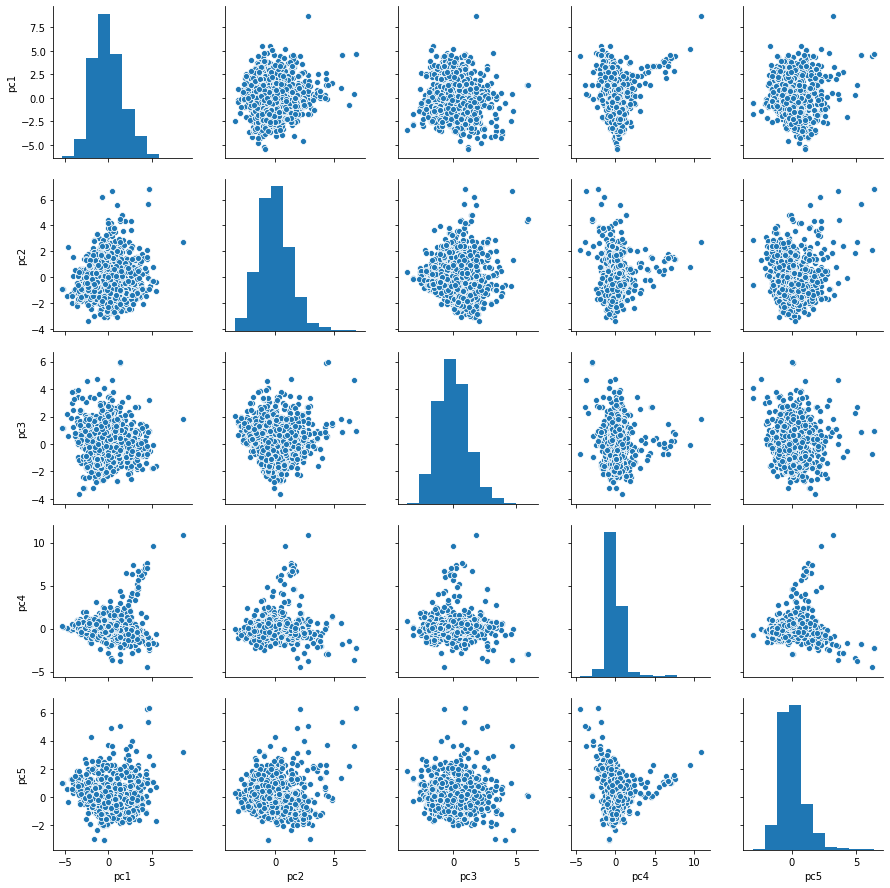

In [19]:
#pairwise scatterplot by category
sns.pairplot(vars=["pc1", "pc2","pc3","pc4","pc5"],data=principalDf) 

In [12]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report,precision_score
%matplotlib inline

In [13]:
lda = LinearDiscriminantAnalysis() #x = df.loc[:, features].values 
ind=['pc1','pc2','pc3','pc4','pc5']
x = principalDf.loc[:,ind].values
model = lda.fit(x, y)
print(model.priors_)
pred=model.predict(x)

[0.00625391 0.03314572 0.42589118 0.39899937 0.12445278 0.01125704]


/Users/zhaojiale/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
print(confusion_matrix(pred, y))

[[  1   0   0   0   0   0]
 [  1   0   0   0   0   0]
 [  8  35 514 248  15   0]
 [  0  16 158 333 109  10]
 [  0   2   9  57  75   8]
 [  0   0   0   0   0   0]]


In [15]:
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(x, y)
print(model2.priors_)
print(model2.means_)

[0.00625391 0.03314572 0.42589118 0.39899937 0.12445278 0.01125704]
[[-0.70585419  0.42082974 -1.94425638  0.40499236  0.85634628]
 [-0.88263198  0.09941731 -0.85007686  0.04877734  0.45025035]
 [-0.05267789  0.59148692 -0.37291807  0.0212872  -0.18961296]
 [-0.01087594 -0.26998505  0.16277457  0.013305    0.047967  ]
 [ 0.46801779 -1.07074535  0.95372926 -0.14205079  0.29910763]
 [ 0.19527735 -1.49728991  1.37841896 -0.07512152  0.36524054]]


/Users/zhaojiale/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
pred2=model2.predict(x) 
print(np.unique(pred2, return_counts=True)) 
print(confusion_matrix(pred2, y))

(array([3, 4, 5, 6, 7, 8]), array([  7,  28, 756, 645, 152,  11]))
[[  4   1   2   0   0   0]
 [  0   2  16   9   1   0]
 [  4  36 490 213  13   0]
 [  2  13 160 361 100   9]
 [  0   1  13  52  81   5]
 [  0   0   0   3   4   4]]


In [ ]:
 sns.countplot(x='quality',data=data)